In [2]:
import pandas as pd
from sqlalchemy import create_engine
import datetime
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [3]:
# engine = create_engine("sqlite:///data/hashtag2020.db", echo=True)
# conn = engine.connect()

In [4]:
# #Create the table. If we use automap_base, the table must have a primary key
# conn.execute("""
#     CREATE TABLE IF NOT EXISTS tweet_counts (
#         id integer PRIMARY KEY,
#         created_at TEXT,
#         tweet VARCHAR(280),
#         likes integer,
#         retweet_count integer,
#         source VARCHAR(30),
#         lat integer,
#         long integer,
#         city VARCHAR(100),
#         state_code VARCHAR(5),
#         hashtag VARCHAR(10),
#         Date TEXT,
#         Time TEXT,
#         polarity integer,
#         analysis VARCHAR(20)
        
#     )
# """)

In [5]:
trump_csv_path = "../hashtag_donaldtrump.csv"
biden_csv_path = "../hashtag_joebiden.csv"

In [6]:
trump_data_df = pd.read_csv(trump_csv_path, lineterminator='\n')
biden_data_df = pd.read_csv(biden_csv_path, lineterminator='\n')

In [7]:
trump_data_df["hashtag"]="Trump"
biden_data_df["hashtag"]="Biden"

In [8]:
tweet_df = pd.concat([trump_data_df, biden_data_df])

In [9]:
tweet_df["created_at"]=pd.to_datetime(tweet_df.created_at)

In [10]:
tweet_df.sort_values(by = 'created_at')

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Biden
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,Trump
970918,2020-11-08 23:59:55,1.325589e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,Twitter Web App,4.519791e+08,Dunken K Bliths,DunkenKBliths,"""Tesla owner's will be followed back""\n\n#Mach...",...,✔ Official Twitter Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.807500,Trump
922910,2020-11-08 23:59:56,1.325589e+18,@nbcbayarea Who doesn’t like dogs or any kind ...,1.0,1.0,Twitter for iPhone,1.182639e+08,Dianna Maria,DiannaMaria,"~ I am a very proud mom of a sweet, kind and c...",...,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,2020-11-09 17:46:06.939099,Trump
737089,2020-11-08 23:59:57,1.325589e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,Twitter for iPhone,1.148479e+08,Nataša,PewPeeew,My brain consists of coping mechanisms and vin...,...,Deutschland,51.083420,10.423447,NaN,Germany,Europe,NaN,NaN,2020-11-09 18:26:04.550843,Biden


In [25]:
tweet_df.dtypes

created_at              datetime64[ns]
tweet_id                       float64
tweet                           object
likes                          float64
retweet_count                  float64
source                          object
user_id                        float64
user_name                       object
user_screen_name                object
user_description                object
user_join_date                  object
user_followers_count           float64
user_location                   object
lat                            float64
long                           float64
city                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at                    object
hashtag                         object
dtype: object

In [11]:
usa = {"United States of America" : "United States"}
tweet_df['country'].replace(usa, inplace=True)


In [12]:
clean_df = tweet_df.dropna(how='any')

In [13]:
clean_df = clean_df.loc[clean_df['country']== 'United States']

In [14]:
print("Count of duplicates: {}".format(clean_df.duplicated(subset=["tweet"]).sum()))

Count of duplicates: 21056


In [15]:
print("Original size of df: {}".format(len(clean_df)))
clean_df.drop_duplicates(subset=["tweet"], inplace=True, keep=False)
print("No duplicates size of df : {}".format(len(clean_df)))

Original size of df: 182384
No duplicates size of df : 141640


In [16]:
clean_df.reset_index(inplace=True)

In [17]:
clean_df['Date'] = clean_df['created_at'].dt.strftime('%m/%d/%Y')
clean_df['Time'] = clean_df['created_at'].dt.strftime('%H:%M:%S')

In [18]:
clean_df = clean_df.rename(columns = {'index': 'id'}, inplace = False)


In [19]:
clean_df = clean_df[['id', 'tweet', 'likes', 'retweet_count', 'source', 'lat', 'long', 'city','state_code','hashtag', 'Date', 'Time']]

In [20]:
clean_df = clean_df[['tweet', 'likes', 'retweet_count', 'source', 'lat', 'long', 'city','state_code','hashtag', 'Date', 'Time']]

In [21]:
clean_df.reset_index(inplace=True)

In [22]:
clean_df = clean_df.rename(columns = {'index': 'id'}, inplace = False)
clean_df.head()

,id,tweet,likes,retweet_count,source,lat,long,city,state_code,hashtag,Date,Time
0,0,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,45.520247,-122.674195,Portland,OR,Trump,10/15/2020,00:00:02
1,1,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,38.894992,-77.036558,Washington,DC,Trump,10/15/2020,00:00:08
2,2,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,32.717421,-117.162771,San Diego,CA,Trump,10/15/2020,00:00:26
3,3,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,45.520247,-122.674195,Portland,OR,Trump,10/15/2020,00:01:14
4,4,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,41.882823,-87.686307,Chicago,IL,Trump,10/15/2020,00:01:30


In [23]:
clean_df['id'].value_counts()

2047      1
34106     1
136552    1
44351     1
42302     1
         ..
125672    1
123625    1
129770    1
127723    1
0         1
Name: id, Length: 141640, dtype: int64

In [24]:
clean_df['city'].value_counts()

New York              27657
Los Angeles           12777
Washington            11783
Chicago                5819
San Francisco          4144
                      ...  
Brockton                  1
El Monte                  1
Mendham Township          1
Coolbaugh Township        1
Boulder City              1
Name: city, Length: 528, dtype: int64

In [33]:
clean_df.groupby("city").mean()



,id,likes,retweet_count,lat,long
city,,,,,
Abilene,62526.375000,3.500000,2.875000,32.446450,-99.747591
Abington Township,21202.000000,0.000000,0.000000,40.102333,-75.152119
Aiea,98312.500000,0.000000,0.000000,21.358756,-157.945498
Akron,75358.510204,0.952381,0.210884,41.085088,-81.517803
Albany,74477.518868,1.509434,0.273585,42.651167,-73.754968
...,...,...,...,...,...
Yakima,87483.000000,0.222222,0.000000,46.601557,-120.510842
Yonkers,82835.505495,2.351648,0.472527,40.931210,-73.898747
York,38788.000000,0.250000,0.000000,39.962398,-76.727392


In [23]:
# clean_df['lat_long'] = list(zip(clean_df.lat, clean_df.long))

In [24]:
#cleaning the tweets
def clean_tweets(tweet):
 
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub(r'‚Ä¶', '', str(tweet))
    tweet = re.sub('@[A-Za-z0–9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) # Removing '#' hash tag
    tweet = re.sub('https?:\/\/\S+', '', str(tweet)) # Removing hyperlink
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ',str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('https ', '', tweet)
    tweet = re.sub('co', '', tweet)

    return tweet

In [25]:
def getSubjectivity(tweet):
    try:
        return TextBlob(tweet).sentiment.subjectivity
    except:
        return None


# Create a function to get the polarity
def getPolarity(tweet):
    try:
        return  TextBlob(tweet).sentiment.polarity
    except:
        return None

def sentiment_calc(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None

# country='United States'
clean_df['edited_tweet'] = clean_df['tweet'].apply(clean_tweets)
clean_df['subjectivity'] = clean_df['edited_tweet'].apply(getSubjectivity)
clean_df['polarity'] = clean_df['edited_tweet'].apply(getPolarity)
clean_df['sentiment'] = clean_df['edited_tweet'].apply(sentiment_calc)

def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

clean_df['analysis'] = clean_df['polarity'].apply(getAnalysis)

In [26]:
# biden
biden=clean_df[clean_df['hashtag']=='Biden']
trump=clean_df[clean_df['hashtag']=='Trump']

Text(0.5, 1.0, 'Sentiment Analyisis Biden US')

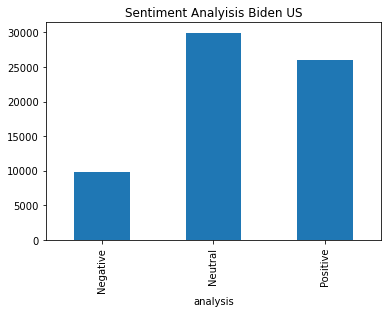

In [27]:
biden.groupby('analysis')['analysis'].count().plot.bar()
plt.title('Sentiment Analyisis Biden US')

Text(0.5, 1.0, 'Sentiment Analyisis Biden US')

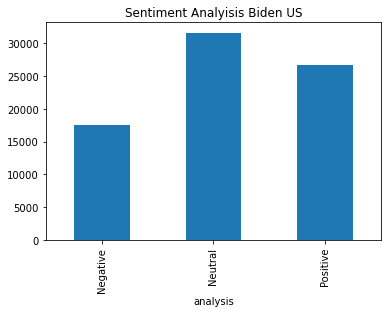

In [28]:
trump.groupby('analysis')['analysis'].count().plot.bar()
plt.title('Sentiment Analyisis Biden US')

Neutral     29940
Positive    26064
Negative     9762
Name: analysis, dtype: int64


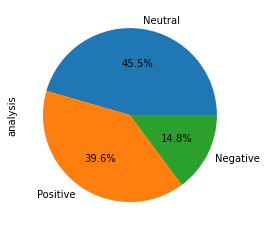

In [29]:
counts = biden.analysis.value_counts()
print(counts)
pieplot = counts.plot(kind='pie',autopct='%1.1f%%')

Neutral     31606
Positive    26721
Negative    17547
Name: analysis, dtype: int64


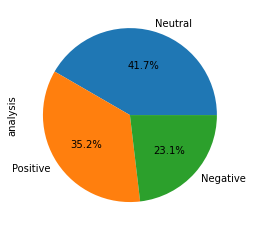

In [30]:
counts = trump.analysis.value_counts()
print(counts)
pieplot = counts.plot(kind='pie',autopct='%1.1f%%')

In [31]:
clean_df = clean_df[['id', 'tweet', 'likes', 'retweet_count', 'source', 'lat', 'long', 'city','state_code','hashtag', 'Date', 'Time', 'polarity', 'analysis']]

In [32]:
clean_df.head()

,id,tweet,likes,retweet_count,source,lat,long,city,state_code,hashtag,Date,Time,polarity,analysis
0,0,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,45.520247,-122.674195,Portland,OR,Trump,10/15/2020,00:00:02,0.333333,Positive
1,1,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,38.894992,-77.036558,Washington,DC,Trump,10/15/2020,00:00:08,0.000000,Neutral
2,2,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,32.717421,-117.162771,San Diego,CA,Trump,10/15/2020,00:00:26,0.500000,Positive
3,3,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,45.520247,-122.674195,Portland,OR,Trump,10/15/2020,00:01:14,0.261905,Positive
4,4,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,41.882823,-87.686307,Chicago,IL,Trump,10/15/2020,00:01:30,0.000000,Neutral


In [33]:
# clean_df = clean_df.groupby / city / avg / polarity
# left join or right combine dataframes


In [34]:
# clean_df.to_sql("tweet_counts", conn, if_exists="append", index=False)

2021-02-08 19:42:20,617 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("tweet_counts")
2021-02-08 19:42:20,617 INFO sqlalchemy.engine.base.Engine ()
2021-02-08 19:42:20,695 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-02-08 19:42:21,944 INFO sqlalchemy.engine.base.Engine INSERT INTO tweet_counts (id, tweet, likes, retweet_count, source, lat, long, city, state_code, hashtag, "Date", "Time", polarity, analysis) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-02-08 19:42:21,945 INFO sqlalchemy.engine.base.Engine ((0, "#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?", 2.0, 1.0, 'Twitter Web App', 45.5202471, -122.6741949, 'Portland', 'OR', 'Trump', '10/15/2020', '00:00:02', 0.3333333333333333, 'Positive'), (1, 'You get a tie! And you get a tie! #Tr

In [ ]:
#Count of tweets total
countdf = clean_df["hashtag"]
countdf = clean_df["hashtag"].value_counts().rename_axis('hashtag').to_frame('counts').reset_index()
countdf

In [ ]:
count = countdf.plot.bar(x = 'hashtag', y = 'counts', rot=0)

In [ ]:
# count of tweets by state
trump_state = clean_df.loc[clean_df['hashtag']== 'Trump', :]
trump_state = trump_state.groupby(['state']).count()
state_t = pd.DataFrame(trump_state)

biden_state = clean_df.loc[clean_df['hashtag']== 'Biden', :]
biden_state = biden_state.groupby(['state']).count()
state_b = pd.DataFrame(biden_state)

state_data = pd.merge (state_t, state_b, on = 'state')
state_data = state_data.rename(columns={'tweet_x': 'Trump Tweets', 'tweet_y':'Biden Tweets'})


state_data = state_data[['Trump Tweets', 'Biden Tweets']]
state_data.head()

In [ ]:
state_data.plot(kind='bar',title='Number of Tweets per State', figsize=(20,10), width = 1)
plt.xlabel('State')
plt.ylabel('Number of Tweets')

In [ ]:
# Top 5 sources
trump_source = clean_df.loc[clean_df['hashtag']== 'Trump', :]
trump_source = trump_source.groupby(['source']).count().tweet.sort_values(ascending=False)[:6]
source_t = pd.DataFrame(trump_source)

biden_source = clean_df.loc[clean_df['hashtag']== 'Biden', :]
biden_source = biden_source.groupby(['source']).count().tweet.sort_values(ascending=False)[:6]
source_b = pd.DataFrame(biden_source)

source_data = pd.merge (source_t, source_b, on = 'source')
source_data = source_data.rename(columns={'tweet_x': 'Trump Tweets', 'tweet_y':'Biden Tweets'})


source_data = source_data[['Trump Tweets', 'Biden Tweets']]
source_data.head()

In [ ]:
source_data.plot(kind='bar',title='Number of Tweets per Source', figsize=(20,10), width = 0.75)
plt.xlabel('Source')
plt.ylabel('Number of Tweets')